In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC, SVR
from sklearn.metrics import accuracy_score

## Load data

In [2]:
x_train = np.load("x_train.npy")
y_train = np.load("y_train.npy")
x_test = np.load("x_test.npy")
y_test = np.load("y_test.npy")

In [3]:
# 550 data with 300 features
print(x_train.shape)

(550, 300)


In [4]:
# It's a binary classification problem 
print(np.unique(y_train))

[0 1]


## Question 1
K-fold data partition: Implement the K-fold cross-validation function. Your function should take K as an argument and return a list of lists (len(list) should equal to K), which contains K elements. Each element is a list contains two parts, the first part contains the index of all training folds, e.g. Fold 2 to Fold 5 in split 1. The second part contains the index of validation fold, e.g. Fold 1 in  split 1

In [5]:
def cross_validation(x_train, y_train, k=5):
    idx_shuffle = np.arange(x_train.shape[0])
    np.random.shuffle(idx_shuffle)
    k_fold_ = []
    valid_tail = 0
    length = idx_shuffle.shape[0] // k
    for i in range(k):
        # If the sample size is not divisible by K
        if i < idx_shuffle.shape[0] % k:
            valid_tail = valid_tail + (length+1)
            valid_head = valid_tail - (length+1)
        else:
            valid_tail = valid_tail + length
            valid_head = valid_tail - length
        valid = []
        valid = np.sort(idx_shuffle[valid_head:valid_tail])
        if valid_head == 0 and valid_tail != idx_shuffle.shape[0]:
            k_fold_train = idx_shuffle[valid_tail:]
        elif valid_head != 0 and valid_tail == idx_shuffle.shape[0]:
            k_fold_train = idx_shuffle[:valid_head]
        elif valid_head == 0 and valid_tail == idx_shuffle.shape[0]:
            k_fold_train = idx_shuffle
        else:
            k_fold_train = np.concatenate((idx_shuffle[:valid_head],
                                           idx_shuffle[valid_tail:]))
        k_fold_train = np.sort(k_fold_train)
        k_fold_.append([k_fold_train, valid])
        # print("Split: %s,\nTraining index: %s,\nValidation index: %s"
        #      % (i+1, k_fold_train, valid))
    return k_fold_

### The result of given data

In [6]:
kfold_data = cross_validation(x_train, y_train, k=10)
assert len(kfold_data) == 10 # should contain 10 fold of data
assert len(kfold_data[0]) == 2 # each element should contain train fold and validation fold
assert kfold_data[0][1].shape[0] == 55 # The number of data in each validation fold should equal to training data divieded by K
for i in range(len(kfold_data)):
    print("Split: %s,\nTraining index: %s, Training length: %s\n\
Validation index: %s, Validation length: %s"
          % (i+1, kfold_data[i][0], kfold_data[i][0].shape[0],
             kfold_data[i][1], kfold_data[i][1].shape[0]))

Split: 1,
Training index: [  0   1   2   3   4   5   6   7   8  11  12  13  14  15  16  17  19  20
  21  22  23  24  25  26  28  30  31  32  33  34  35  36  37  38  39  40
  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  57  59  60
  61  62  63  64  65  66  67  69  70  71  72  74  75  76  77  78  79  80
  81  82  83  84  85  86  87  88  89  90  91  92  94  95  96  97  98  99
 103 104 105 106 107 108 110 111 112 113 114 115 117 118 119 120 121 122
 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140
 141 142 143 144 146 147 150 151 152 153 154 155 156 157 162 163 165 166
 167 168 169 170 171 172 173 175 176 177 178 179 180 181 182 183 184 185
 186 187 188 189 190 191 192 193 194 195 196 197 198 199 201 202 203 205
 206 207 208 209 210 211 212 213 214 216 217 218 219 220 221 222 223 224
 226 227 228 229 230 231 232 233 234 237 238 239 240 241 242 243 244 245
 246 247 248 250 251 252 253 255 256 257 258 259 260 261 262 263 265 266
 267 268 269 270 271 273 

### If the sample size is divisible by K with less data

In [7]:
kfold_data = cross_validation(x_train[0:20], y_train[0:20], k=10)
# should contain 10 fold of data
assert len(kfold_data) == 10
# each element should contain train fold and validation fold
assert len(kfold_data[0]) == 2
# The number of data in each validation fold
# should equal to training data divieded by K
assert kfold_data[0][1].shape[0] == 2
for i in range(len(kfold_data)):
    print("Split: %s,\nTraining index: %s, Training length: %s\n\
Validation index: %s, Validation length: %s"
          % (i+1, kfold_data[i][0], kfold_data[i][0].shape[0],
             kfold_data[i][1], kfold_data[i][1].shape[0]))


Split: 1,
Training index: [ 0  1  2  3  4  5  6  7  8  9 10 12 13 15 16 17 18 19], Training length: 18
Validation index: [11 14], Validation length: 2
Split: 2,
Training index: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 14 15 17 18 19], Training length: 18
Validation index: [13 16], Validation length: 2
Split: 3,
Training index: [ 0  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19], Training length: 18
Validation index: [1 3], Validation length: 2
Split: 4,
Training index: [ 1  2  3  4  5  6  7  9 10 11 12 13 14 15 16 17 18 19], Training length: 18
Validation index: [0 8], Validation length: 2
Split: 5,
Training index: [ 0  1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 19], Training length: 18
Validation index: [ 2 18], Validation length: 2
Split: 6,
Training index: [ 0  1  2  3  4  5  7  8  9 10 11 12 13 14 15 16 18 19], Training length: 18
Validation index: [ 6 17], Validation length: 2
Split: 7,
Training index: [ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 16 17 18 19], Training length

### If the sample size is not divisible by K with less data

In [8]:
kfold_data = cross_validation(x_train[0:23], y_train[0:23], k=10)
# should contain 10 fold of data
assert len(kfold_data) == 10
# each element should contain train fold and validation fold
assert len(kfold_data[0]) == 2
# The number of data in each validation fold
# should equal to training data divieded by K
assert kfold_data[0][1].shape[0] == 3
for i in range(len(kfold_data)):
    print("Split: %s,\nTraining index: %s, Training length: %s\n\
Validation index: %s, Validation length: %s"
          % (i+1, kfold_data[i][0], kfold_data[i][0].shape[0],
             kfold_data[i][1], kfold_data[i][1].shape[0]))


Split: 1,
Training index: [ 0  1  3  4  5  6  7  8  9 10 11 12 14 15 16 17 18 20 21 22], Training length: 20
Validation index: [ 2 13 19], Validation length: 3
Split: 2,
Training index: [ 0  1  2  3  4  5  6  8  9 10 11 12 13 16 17 18 19 20 21 22], Training length: 20
Validation index: [ 7 14 15], Validation length: 3
Split: 3,
Training index: [ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 17 18 19 20 21 22], Training length: 20
Validation index: [ 0  1 16], Validation length: 3
Split: 4,
Training index: [ 0  1  2  3  4  6  7  9 10 11 12 13 14 15 16 17 18 19 20 21 22], Training length: 21
Validation index: [5 8], Validation length: 2
Split: 5,
Training index: [ 0  1  2  3  4  5  6  7  8  9 11 12 13 14 15 16 17 19 20 21 22], Training length: 21
Validation index: [10 18], Validation length: 2
Split: 6,
Training index: [ 0  1  2  3  4  5  6  7  8  9 10 11 13 14 15 16 18 19 20 21 22], Training length: 21
Validation index: [12 17], Validation length: 2
Split: 7,
Training index: [ 0  1  2  3  5 

## example

In [9]:
from sklearn.model_selection import KFold

X = np.arange(20)
kf = KFold(n_splits=5, shuffle=True)
kfold_data= []
for i, (train_index, val_index) in enumerate(kf.split(X)):
    print("Split: %s, Training index: %s, Validation index: %s" % (i+1, train_index, val_index))
    kfold_data.append([train_index, val_index])

Split: 1, Training index: [ 0  1  2  3  5  6  8  9 10 11 12 13 14 16 18 19], Validation index: [ 4  7 15 17]
Split: 2, Training index: [ 0  2  3  4  5  6  7  9 11 12 13 15 16 17 18 19], Validation index: [ 1  8 10 14]
Split: 3, Training index: [ 0  1  2  3  4  7  8  9 10 11 12 14 15 16 17 19], Validation index: [ 5  6 13 18]
Split: 4, Training index: [ 1  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18], Validation index: [ 0  2  3 19]
Split: 5, Training index: [ 0  1  2  3  4  5  6  7  8 10 13 14 15 17 18 19], Validation index: [ 9 11 12 16]


In [10]:
assert len(kfold_data) == 5 # should contain 5 fold of data
assert len(kfold_data[0]) == 2 # each element should contains index of training fold and validation fold
assert kfold_data[0][1].shape[0] == 4 # The number of data in each validation fold should equal to training data divieded by K
for i in range(len(kfold_data)):
    print("Split: %s,\nTraining index: %s, Training length: %s\n\
Validation index: %s, Validation length: %s"
          % (i+1, kfold_data[i][0], kfold_data[i][0].shape[0],
             kfold_data[i][1], kfold_data[i][1].shape[0]))

Split: 1,
Training index: [ 0  1  2  3  5  6  8  9 10 11 12 13 14 16 18 19], Training length: 16
Validation index: [ 4  7 15 17], Validation length: 4
Split: 2,
Training index: [ 0  2  3  4  5  6  7  9 11 12 13 15 16 17 18 19], Training length: 16
Validation index: [ 1  8 10 14], Validation length: 4
Split: 3,
Training index: [ 0  1  2  3  4  7  8  9 10 11 12 14 15 16 17 19], Training length: 16
Validation index: [ 5  6 13 18], Validation length: 4
Split: 4,
Training index: [ 1  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18], Training length: 16
Validation index: [ 0  2  3 19], Validation length: 4
Split: 5,
Training index: [ 0  1  2  3  4  5  6  7  8 10 13 14 15 17 18 19], Training length: 16
Validation index: [ 9 11 12 16], Validation length: 4


## Question 2
Using sklearn.svm.SVC to train a classifier on the provided train set and conduct the grid search of “C” and “gamma” to find the best parameters by cross-validation.

In [11]:
def generate_param(a, b):
    C = []
    gamma = []
    avg_score = []
    for i in range(a, b):  # adjustable
        C.append(10**i)
        gamma.append(round(1/x_train.shape[1], 3) * (10**i))
    gamma = [round(i, 7) for i in gamma]
    return C, gamma


def grid_search(x_train, y_train, k, C, gamma, mode):
    avg_score = []
    for i, C_ in enumerate(C):
        for j, gamma_ in enumerate(gamma):
            if mode == 'classify':
                clf = SVC(C=C_, kernel='rbf', gamma=gamma_)
                kfold = cross_validation(x_train, y_train, k)
                sc_train = []
                for m in range(len(kfold)):
                    clf.fit(x_train[kfold[m][0].astype(int)],
                            y_train[kfold[m][0].astype(int)])
                    clf.predict(x_train[kfold[m][1].astype(int)])
                    sc = clf.score(x_train[kfold[m][1].astype(int)],
                                   y_train[kfold[m][1].astype(int)])
                    sc_train.append(sc)
                avg_sc = sum(sc_train) / len(sc_train)
                avg_score.append(avg_sc)
                best_idx = avg_score.index(max(avg_score))
            else:
                clf = SVR(C=C_, kernel='rbf', gamma=gamma_)
                kfold = cross_validation(x_train, y_train, k)
                sc_train = []
                for m in range(len(kfold)):
                    clf.fit(x_train[kfold[m][0].astype(int)],
                            y_train[kfold[m][0].astype(int)])
                    clf.predict(x_train[kfold[m][1].astype(int)])
                    sc = clf.score(x_train[kfold[m][1].astype(int)],
                                   y_train[kfold[m][1].astype(int)])
                    sc_train.append(sc)
                avg_sc = sum(sc_train) / len(sc_train)
                avg_score.append(avg_sc)
                best_idx = avg_score.index(max(avg_score))

    best_C_ = C[best_idx//len(C)]
    best_gamma_ = gamma[best_idx % len(gamma)]
    score_2D_ = np.reshape((np.array(avg_score)).round(decimals=2),
                           (len(C), len(gamma)))
    return best_C_, best_gamma_, score_2D_


In [12]:
C_, gamma_ = generate_param(-4, 4)
best_C, best_gamma, score_2D_ =\
    grid_search(x_train, y_train,
                k=5, C=C_, gamma=gamma_,
                mode='classify')

print(f'best_C = {best_C}, best_gamma = {best_gamma}')


best_C = 1000, best_gamma = 0.0003


## Question 3
Plot the grid search results of your SVM. The x, y represents the hyperparameters of “gamma” and “C”, respectively. And the color represents the average score of validation folds
You reults should be look like this reference image below ![image](https://miro.medium.com/max/1296/1*wGWTup9r4cVytB5MOnsjdQ.png) 

In [13]:
def heatmap_plot(C, gamma, score_2D):
    fig, ax = plt.subplots()
    im = ax.imshow(score_2D)

    # We want to show all ticks...
    ax.set_xticks(np.arange(len(gamma)))
    ax.set_yticks(np.arange(len(C)))
    # ... and label them with the respective list entries
    ax.set_xticklabels(gamma)
    ax.set_yticklabels(C)
    ax.set_ylabel("C Parameter")
    ax.set_xlabel("gamma Parameter")
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=90, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(C)):
        for j in range(len(gamma)):
            text = ax.text(j, i, score_2D[i, j],
                           ha="center", va="center", color="w")

    ax.set_title("Hyperparameter Gridsearch")
    cbar_kw = {}
    cbarlabel = ""
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    plt.show()
    return


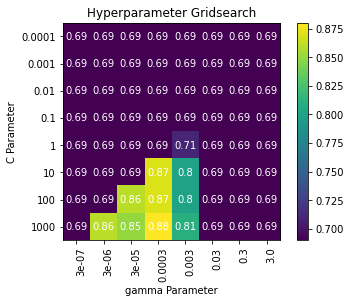

In [14]:
heatmap_plot(C_, gamma_, score_2D_)

## Question 4
Train your SVM model by the best parameters you found from question 2 on the whole training set and evaluate the performance on the test set.

In [15]:
clf = SVC(C=best_C, kernel='rbf', gamma=best_gamma)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print("Accuracy score: ", accuracy_score(y_pred, y_test))

Accuracy score:  0.9114583333333334
